<a href="https://www.kaggle.com/code/mohammedmohsen0404/proj18-flight-fares-prediction?scriptVersionId=192992861" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
**<center><h1>Flight Fares Prediction</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

This project aims to predict flight fares using machine learning techniques. By analyzing flight data collected from EaseMyTrip, the project seeks to develop models that help users make informed decisions about when and where to purchase flight tickets.

# **Import Libraries and Data**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install category_encoders

In [3]:
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d yashdharme36/airfare-ml-predicting-flight-fares
!unzip airfare-ml-predicting-flight-fares.zip

cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/yashdharme36/airfare-ml-predicting-flight-fares
License(s): CC0-1.0
  0%|                                               | 0.00/6.66M [00:00<?, ?B/s]
100%|███████████████████████████████████████| 6.66M/6.66M [00:00<00:00, 112MB/s]
Archive:  airfare-ml-predicting-flight-fares.zip
  inflating: Cleaned_dataset.csv     
  inflating: Scraped_dataset.csv     


In [5]:
df = pd.read_csv("Cleaned_dataset.csv").copy()

# **Take a look at the data**
---

In [6]:
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


In [8]:
df.describe()

,Duration_in_hours,Days_left,Fare
count,452088.000000,452088.000000,452088.000000
mean,12.349222,25.627902,22840.100890
std,7.431478,14.300846,20307.963002
min,0.750000,1.000000,1307.000000
25%,6.583300,13.000000,8762.750000
50%,11.333300,26.000000,13407.000000
75%,16.500000,38.000000,35587.000000
max,43.583300,50.000000,143019.000000


In [9]:
df.select_dtypes(include=['object']).describe()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination
count,452088,452088,452088,452088,452088,452088,452088,452088,452088,452088
unique,50,7,9,1405,4,7,4,3,4,7
top,2023-01-31,Monday,Vistara,UK-936,Economy,Delhi,6 AM - 12 PM,1-stop,After 6 PM,Mumbai
freq,9824,72220,231490,5506,252033,83153,184980,369650,200266,82995


In [10]:
df.shape

(452088, 13)

# **Exploratory df Analysis**
---

**Univariate Analysis**

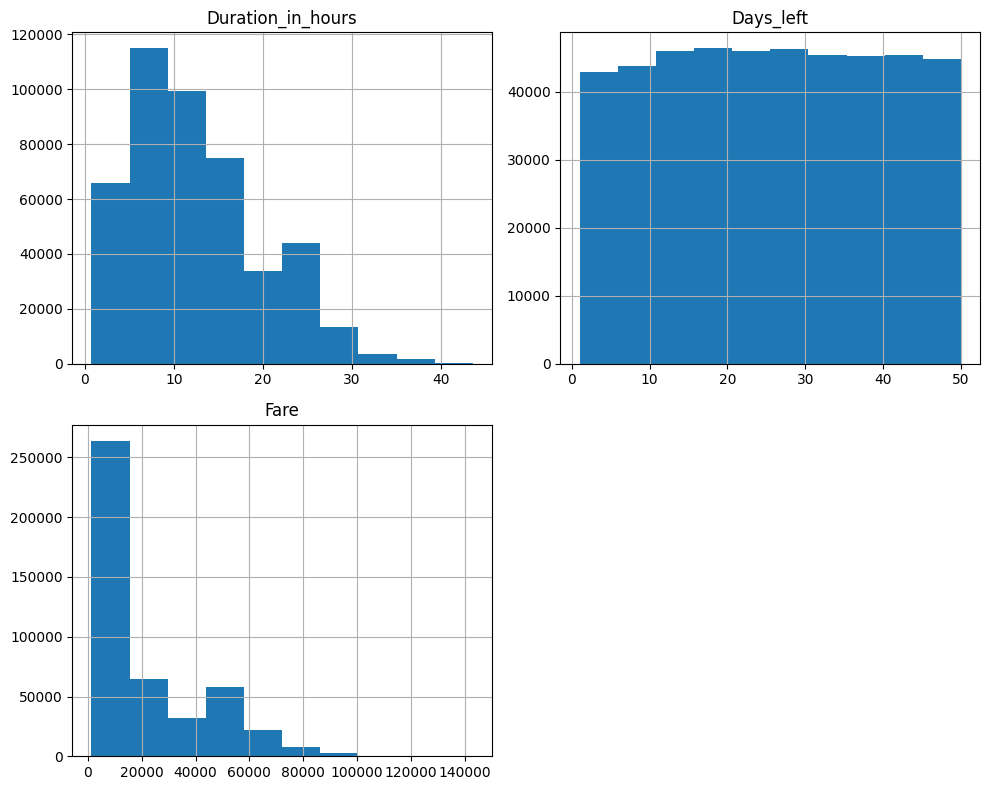

In [11]:
numerical_data = df.select_dtypes(include='number')

numerical_data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

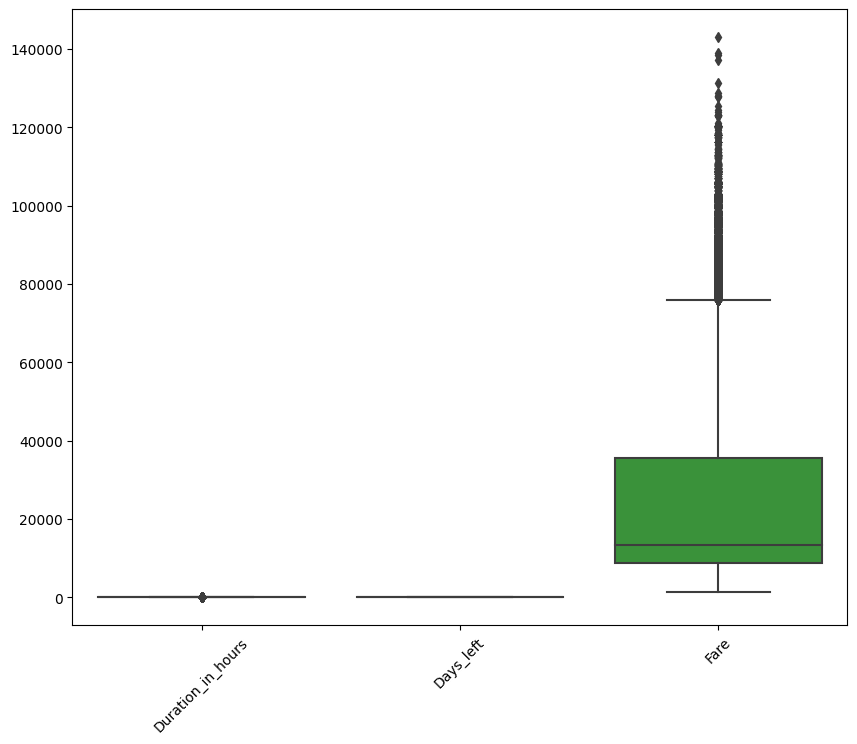

In [12]:
plt.figure(figsize=(10, 8))
sns.boxplot(numerical_data)
plt.xticks(rotation=45)
plt.show()

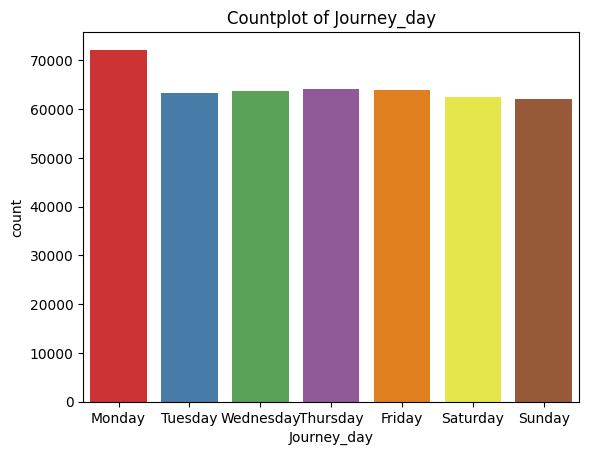

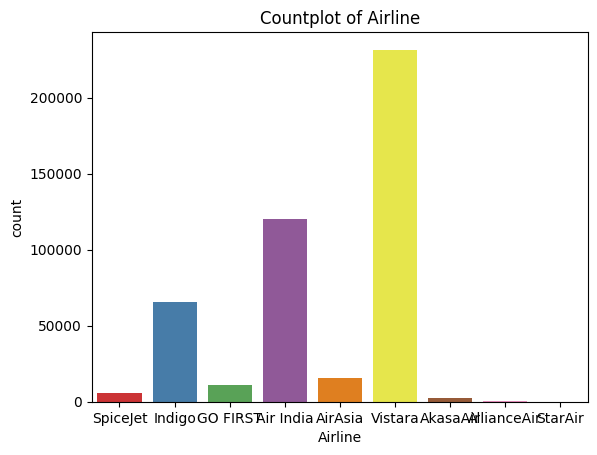

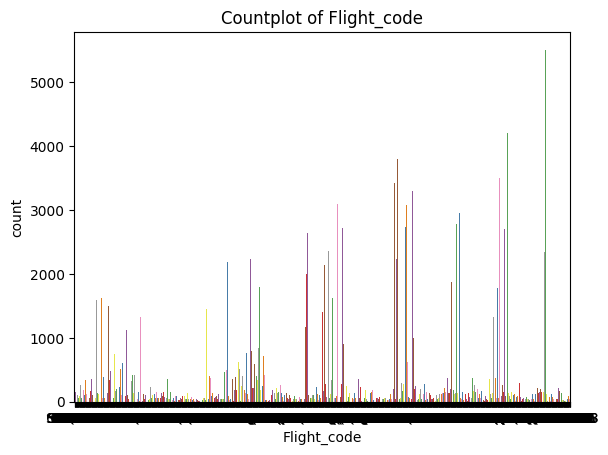

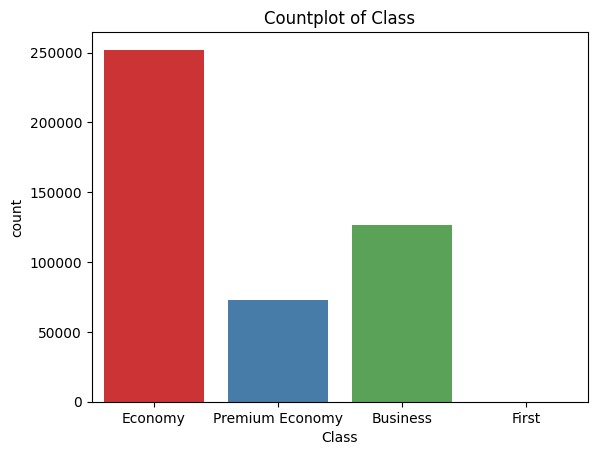

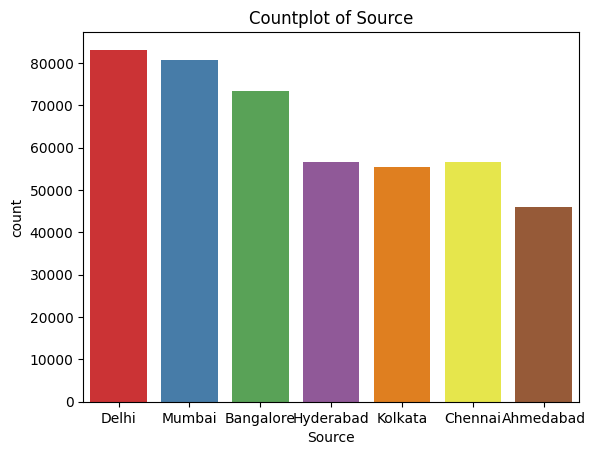

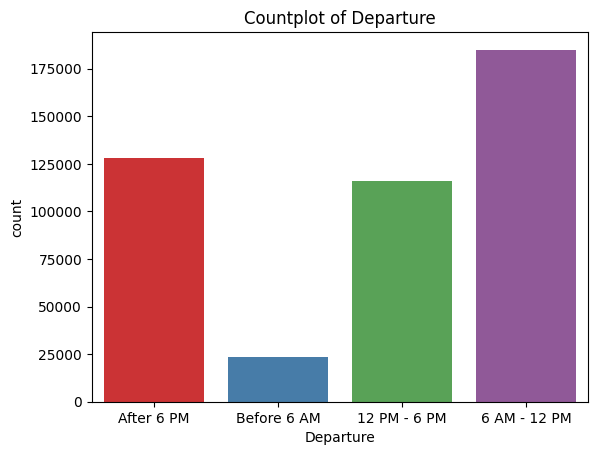

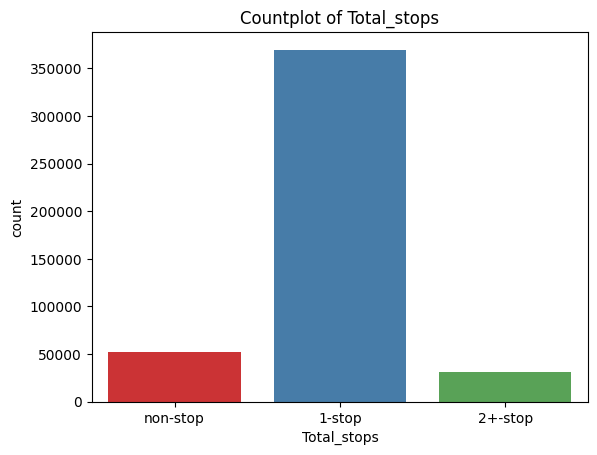

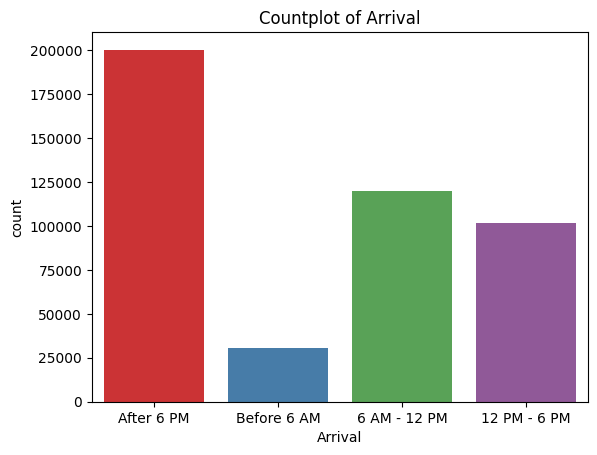

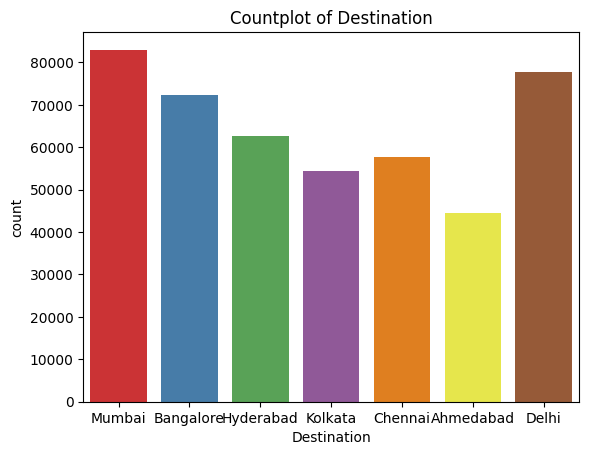

In [13]:
categorical_data = df.select_dtypes(exclude='number').drop('Date_of_journey',axis=1)
for column in categorical_data.columns:
    sns.countplot(data=categorical_data, x=column, palette="Set1")
    plt.title(f"Countplot of {column}")
    plt.show()

**Multivariate Analysis**

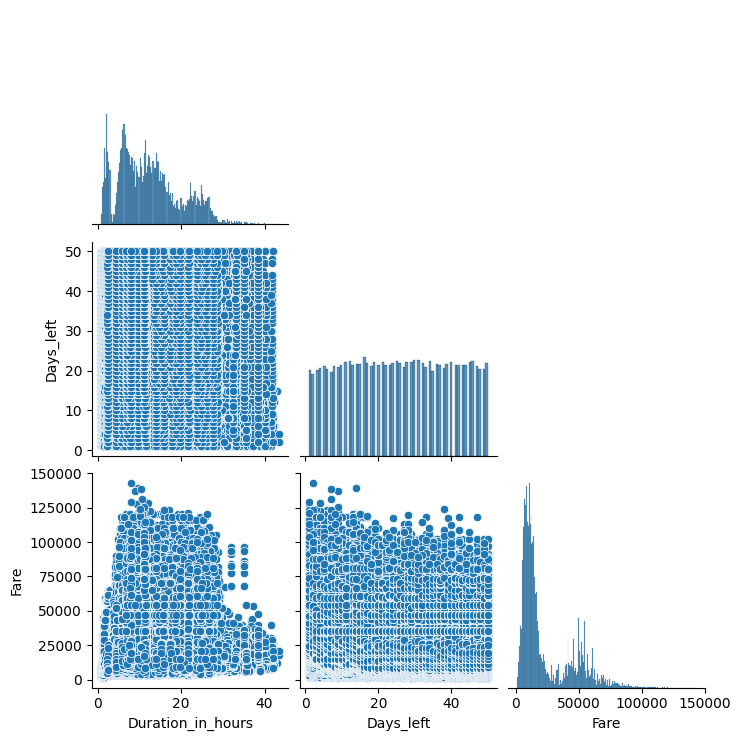

In [14]:
sns.pairplot(df,corner = True)
plt.show()

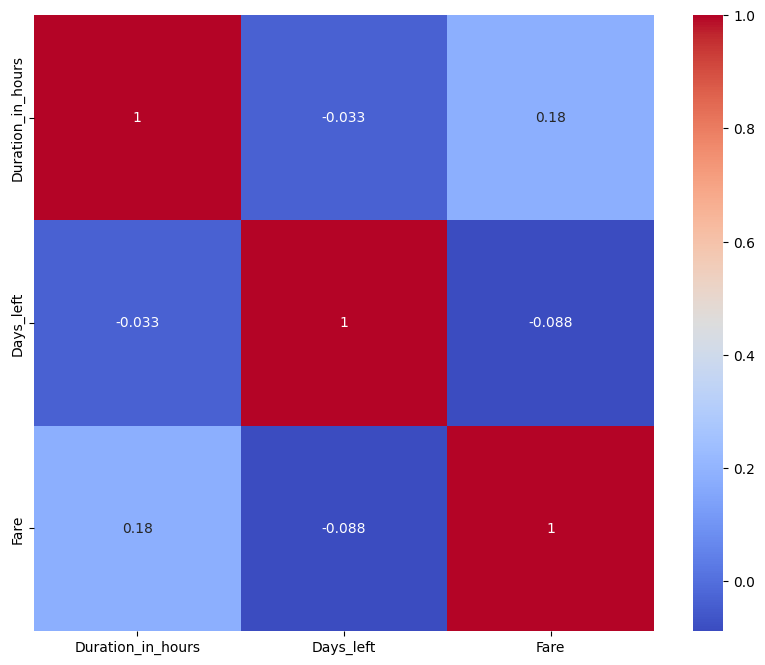

In [15]:
corr = df.select_dtypes(exclude=['object']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show()

# **Data Cleaning**
---

**Drop Unnecessary Columns**

In [16]:
df.drop(['Date_of_journey','Flight_code'], axis=1, inplace=True)

**Handling Duplicate Rows**

In [17]:
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 11069


In [18]:
df.drop_duplicates(inplace=True)

**Handling Missing Data**

In [19]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Journey_day,0,0.0
Airline,0,0.0
Class,0,0.0
Source,0,0.0
Departure,0,0.0
Total_stops,0,0.0
Arrival,0,0.0
Destination,0,0.0
Duration_in_hours,0,0.0
Days_left,0,0.0


In [20]:
total = df.isnull().sum().sum()
print('Total Null values =' ,total)

Total Null values = 0


# **Data Preprocessing**
---

**Encoding Categorical Variables**

In [21]:
categorical_data.head()

,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination
0,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai
1,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai
2,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai
3,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai
4,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai


In [22]:
categorical_data.describe()

,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination
count,452088,452088,452088,452088,452088,452088,452088,452088,452088
unique,7,9,1405,4,7,4,3,4,7
top,Monday,Vistara,UK-936,Economy,Delhi,6 AM - 12 PM,1-stop,After 6 PM,Mumbai
freq,72220,231490,5506,252033,83153,184980,369650,200266,82995


In [23]:
encoder = BinaryEncoder()
df = encoder.fit_transform(df)

In [24]:
df.head(10)

,Journey_day_0,Journey_day_1,Journey_day_2,Airline_0,Airline_1,Airline_2,Airline_3,Class_0,Class_1,Class_2,...,Total_stops_1,Arrival_0,Arrival_1,Arrival_2,Destination_0,Destination_1,Destination_2,Duration_in_hours,Days_left,Fare
0,0,0,1,0,0,0,1,0,0,1,...,1,0,0,1,0,0,1,2.0833,1,5335
1,0,0,1,0,0,1,0,0,0,1,...,1,0,1,0,0,0,1,2.3333,1,5899
2,0,0,1,0,0,1,1,0,0,1,...,1,0,1,0,0,0,1,2.1667,1,5801
3,0,0,1,0,0,0,1,0,0,1,...,1,0,0,1,0,0,1,2.0833,1,5794
4,0,0,1,0,1,0,0,0,0,1,...,1,0,0,1,0,0,1,2.1667,1,5955
5,0,0,1,0,1,0,0,0,0,1,...,1,0,0,1,0,0,1,2.2500,1,5955
6,0,0,1,0,1,0,0,0,0,1,...,1,0,1,0,0,0,1,2.2500,1,5955
7,0,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,0,1,2.2500,1,5899
8,0,0,1,0,0,0,1,0,0,1,...,0,0,1,1,0,0,1,14.3333,1,5829
9,0,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,0,1,2.0833,1,5899


**Skew**

In [25]:
df = np.log1p(df)

**Data splitting**

In [26]:
X = df.drop(['Fare'], axis=1)
y = df['Fare']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.125,random_state=44)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size=.5,random_state=44)

**Data Normalization**

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# **Modeling**
-----

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import xgboost as XGB

In [29]:
regressors = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(random_state=42)),
    ('Lasso Regression', Lasso(random_state=42)),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42)),
    ('Random Forest Regressor', RandomForestRegressor(random_state=42)),
    ('K-Nearest Neighbors Regressor', KNeighborsRegressor()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(random_state=42)),
    ('XGBRegressor',XGB.XGBRegressor(random_state=42))
]

In [30]:
for reg_name, reg in regressors:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    cv_scores = cross_val_score(reg, X_train, y_train, cv=5)
    print(f'{reg_name}:')
    print("Cross Val Score: ", cv_scores.mean())
    print('R2 Score: ', r2_score(y_test, y_pred))
    print("MSE: ", mean_squared_error(y_test, y_pred))
    print("MAE: ", mean_absolute_error(y_test, y_pred))
    print('------------------------------------')

Linear Regression:
Cross Val Score:  0.87075926608565
R2 Score:  0.8707104271834942
MSE:  0.0912004597996456
MAE:  0.23404430316888666
------------------------------------
Ridge Regression:
Cross Val Score:  0.8707592661722879
R2 Score:  0.8707104178163598
MSE:  0.09120046640719286
MAE:  0.2340442765951706
------------------------------------
Lasso Regression:
Cross Val Score:  -3.9083898808245365e-05
R2 Score:  -8.870361121182668e-07
MSE:  0.7053974942525585
MAE:  0.7007066063240046
------------------------------------
Decision Tree Regressor:
Cross Val Score:  0.9349439966327131
R2 Score:  0.938569539127614
MSE:  0.04333285473235392
MAE:  0.1134611856387116
------------------------------------
Random Forest Regressor:
Cross Val Score:  0.9638943005421211
R2 Score:  0.9648675800441826
MSE:  0.024782299021067964
MAE:  0.09558285706041522
------------------------------------
K-Nearest Neighbors Regressor:
Cross Val Score:  0.9260019095703618
R2 Score:  0.9307277891103145
MSE:  0.0488644

# **DNN**
-----

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping , ReduceLROnPlateau
from tensorflow.keras.metrics import R2Score

2024-08-17 16:53:36.347498: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-17 16:53:36.347602: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-17 16:53:36.477184: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [32]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

In [33]:
ES = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
RL = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

In [34]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[R2Score])

In [35]:
history = model.fit(X_train, y_train, epochs=150, batch_size=512, validation_data=(X_val, y_val), callbacks=[ES,RL])

Epoch 1/150
 62/754 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22.9547 - r2_score: -31.6708

I0000 00:00:1723913635.913393     101 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


754/754 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - loss: 5.2870 - r2_score: -6.5290 - val_loss: 1.7274 - val_r2_score: -1.4791 - learning_rate: 0.0010
Epoch 2/150
754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7199 - r2_score: -0.0238 - val_loss: 0.4510 - val_r2_score: 0.3527 - learning_rate: 0.0010
Epoch 3/150
754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5585 - r2_score: 0.2061 - val_loss: 0.2274 - val_r2_score: 0.6736 - learning_rate: 0.0010
Epoch 4/150
754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4725 - r2_score: 0.3276 - val_loss: 0.1313 - val_r2_score: 0.8116 - learning_rate: 0.0010
Epoch 5/150
754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4218 - r2_score: 0.4000 - val_loss: 0.1049 - val_r2_score: 0.8495 - learning_rate: 0.0010
Epoch 6/150
754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3911 - r2_score: 0.4445 - val_loss: 0.0717 - val_r2_score: 0.8971 - learning_rate: 0.0010
Epoch 7/150
754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3628 - r2_score: 0.4837 - 

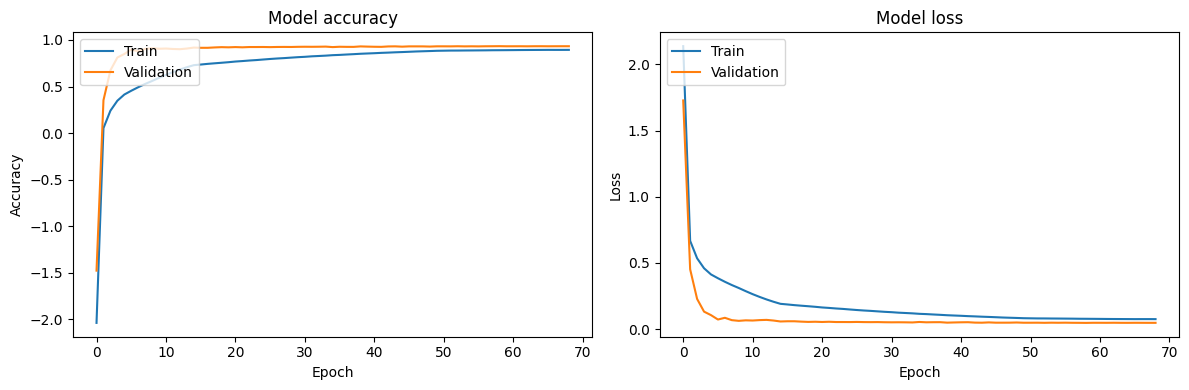

In [36]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['r2_score'])
plt.plot(history.history['val_r2_score'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [37]:
model.evaluate(X_test, y_test)

862/862 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0472 - r2_score: 0.9328


[0.04775381088256836, 0.9322976469993591]